<table align="left" width=100%>
    <tr>
        <td width="10%">
            <img src="title.png">
        </td>
        <td>
            <div align="left">
                <font color="#21618C" size=8px>
                  <b>Heart Disease Prediction
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Problem Statement

Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medical, as it is one of the leading disease related to unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or averion. In this study, we experiment with the heart disease dataset to explore the machine learning algorithms and build an optimum model to predict the disease.                    

## Data Definition

Each attribute is a medical risk factor.

    
**age**: Age of the patient - (Numerical)

**gender**: Gender of the patient - (0,1) - (Male, Female) - (Categorical) 
 
**chest_pain**: It refers to the chest pain experienced by the patient -(0,1,2,3) - (Categorical)
    
**rest_bps**: Blood pressure of the patient while resting(in mm/Hg) - (Numerical)
    
**cholestrol**: Patient's cholestrol level (in mg/dl) - (Numerical)
    
**fasting_blood_sugar**: Blood sugar of the patient while fasting - (>120mg/: = 1, otherwise = 0) - (Categorical)
    
**rest_ecg**: Potassium level (0,1,2) - (Categorical)
    
**thalach**: The patients maximum heart rate - (Numerical)
    
**exer_angina**: It refers to the exercise induced angina - (1=Yes, 0=No) - (Categorical)
    
**old_peak**: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)  (Numerical)
    
**slope**:  It refers to the slope of the peak of the exercise ST Segment- (0,1,2) - (Categorical)
    
**ca**: Number of major vessels - (0,1,2,3,4) - (Categorical)
    
**thalassemia**: It refers to thalassemia which is a blood disorder - (0,1,2,3) - (Categorical)
 
**target**: Patient has heart disease or not - (1=Yes, 0=No) - (Target variable)

## Icon Legends
<table>
  <tr>
    <th width="25%"> <img src="infer.png" style="width:25%;"></th>
    <th width="25%"> <img src="alsoreadicon.png" style="width:25%;"></th>
    <th width="25%"> <img src="todo.png" style="width:25%;"></th>
    <th width="25%"> <img src="quicktip.png" style="width:25%;"></th>
  </tr>
  <tr>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Inferences from outcome</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Additional Reads</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Lets do it</b></font></div>
    </td>
    <td><div align="center" style="font-size:120%">
        <font color="#21618C"><b>Quick Tips</b></font></div>
    </td>

</tr>

</table>

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#set_options)**
3. **[Read Data](#RD)**
4. **[Data Analysis and Preparation](#data_preparation)**
    - 4.1 - **[Understand the Dataset](#Data_Understanding)**
        - 4.1.1 - **[Data Type](#Data_Types)**
        - 4.1.2 - **[Summary Statistics](#Summary_Statistics)**
        - 4.1.3 - **[Distribution of Variables](#distribution_variables)**
        - 4.1.4 - **[Correlation](#correlation)**
        - 4.1.5 - **[Discover Outliers](#outliers)**
        - 4.1.6 - **[Missing Values](#Missing_Values)**      
    - 4.2 - **[Prepare the Data](#Data_Preparation)**
5. **[Decision Tree](#DecisionTree)**
    - 5.1 - **[Decision Tree](#DecisionTreeWFS)**
    - 5.2 - **[Prune a Decision Tree](#DecisionTreePruning)**
    - 5.3 - **[Decision Tree (using GridSearchCV)](#DecisionTreewithGridSearchCv)**
6. **[Conclusion and Interpretation](#conclusion)**

<a id='import_lib'></a>
# 1. Import Libraries

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Import the required libraries and functions</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [1]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' to check if the type of input is string  
from pandas.api.types import is_string_dtype

# import various functions to perform classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import functions to perform logistic regression
import statsmodels
import statsmodels.api as sm

# import functions to plot the decision tree
import pydotplus
from IPython.display import Image  
import graphviz

In [2]:
! pip install pydotplus

In [3]:
! pip install graphviz

In [4]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id='set_options'></a>
# 2. Set Options

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we make necessary changes to :<br><br>
1. Display complete data frames<br>
2. To avoid the exponential number<br>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

In [ ]:
os.chdir('/Users/suchita/DEsktop/PythonSession/HeartDiseaseCaseStudy')

<a id='RD'></a>
# 3. Read Data

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Read and display data to get an insight into the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
# read the excel data file 
df_Heart = pd.read_csv("HeartDisease.csv")

# display the top 5 rows of the dataframe
df_Heart.head()

# Note: To display more rows, example 10, use head(10)

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Dimensions of the data

In [8]:
# 'shape' function gives the total number of rows and columns in the data
df_Heart.shape

(303, 14)

<a id='data_preparation'></a>
# 4. Data Analysis and Preparation

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Data preparation is the process of cleaning and transforming raw data before building predictive models. <br><br>
                        Here, we analyze and prepare data to perform classification techniques:<br>
                        1. Check data types. Ensure your data types are correct. Refer data definitions to validate <br>
                        2. If data types are not as per business definition, change the data types as per requirement <br>
                        3. Study summary statistics<br>
                        4. Distribution of variables<br>
                        5. Study correlation<br>
                        6. Detect outliers<br>
                        7. Check for missing values<br><br>
                        Note: It is an art to explore data, and one needs more and more practice to gain expertise in this area
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Understanding'></a>
## 4.1 Understand the Dataset

<a id='Data_Types'></a>
### 4.1.1 Data Type
The main data types in Pandas dataframes are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>In our dataset, we have numerical and categorical variables. The numeric variables should have data type 'int'/'float' while categorical variables should have data type 'object'.<br><br> 
                        1. Check for the data type <br>
                        2. For any incorrect data type, change the data type with the appropriate type<br>
                        3. Recheck for the data type
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Check for the data type**

In [9]:
# 'dtypes' gives the data type for each column
df_Heart.dtypes

age                      int64
gender                   int64
chest_pain               int64
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar      int64
rest_ecg                 int64
thalach                  int64
exer_angina              int64
old_peak               float64
slope                    int64
ca                       int64
thalassemia              int64
target                   int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above output, it is clear to see that the data type of variables 'old_peak' is 'float64', and rest of the variables are identified as 'int64'.<br><br>
                        But as per data attribute information we have, 'gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia' variables are categorical, which are wrongly interpreted as int64, so we convert these variables' data type to 'object'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**2. Change the incorrect data type.**

In [10]:
# use 'for' loop to change the data type of variables 
for col in ['gender','chest_pain','fasting_blood_sugar','rest_ecg','exer_angina','slope','ca','thalassemia']:
     
    # use .astype() to change the data type
    df_Heart[col] = df_Heart[col].astype('object')

**3. Recheck the data type after the conversion.**

In [11]:
# recheck the data types of all variables
df_Heart.dtypes

age                      int64
gender                  object
chest_pain              object
rest_bps                 int64
cholestrol               int64
fasting_blood_sugar     object
rest_ecg                object
thalach                  int64
exer_angina             object
old_peak               float64
slope                   object
ca                      object
thalassemia             object
target                   int64
dtype: object

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Now we have all the variables with corrected data type as required.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>For convenience, we shall split the target variable from the data frame.
Let dataframe 'df_target' be the dataframe containing the dependent variable and dataframe 'df_features' be the set of all independent variables.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [12]:
# splitting features and the target variable
# consider all the columns except 'target' using 'iloc'
df_features = df_Heart.iloc[:, df_Heart.columns != 'target']

# consider the target variable
df_target = df_Heart.iloc[:,df_Heart.columns == 'target']

Use the dataframe containing features (df_features) for further analysis.

<a id='Summary_Statistics'></a>
### 4.1.2 Summary Statistics

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> In our dataset, we have both numerical and categorical variables. Now we check for summary statistics of all the variables.<br><br>
                        1. For numerical variables, use the describe()<br>
                        2. For categorical variables, use the describe(include=object) 
                        </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. For numerical variables, use the describe()**

In [13]:
# the describe() returns the statistical summary of the variables
# by default, it returns the summary of numerical variables
#We transpose the results for better readability
df_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The above output illustrates the summary statistics of all the numeric variables namely mean, median (50%), standard deviation, minimum, and maximum values, along with the first and third quantiles.<br>
For example, the average age of a person considered in the study is 55 years, where the minimum age is 29 years and the maximum age is 77 years.<br><br>
It can be seen that all the numeric variables have 303 observations which is equal to the total number of observations. This suggests that there are no missing values.</b>  
                    </font>
            </div>
        </td>
    </tr>
</table>

**2. For categorical variables, use the describe(include=object)**

In [14]:
# summary of the categorical variables 
#df_features.describe(include = object)
#Transpose the result for better readability
df_features.describe(include='object').transpose()
# Note: if we pass 'include=object' to the .describe() function returns descriptive statistics for categorical variables only

,count,unique,top,freq
gender,303,2,1,207
chest_pain,303,4,0,143
fasting_blood_sugar,303,2,0,258
rest_ecg,303,3,1,152
exer_angina,303,2,0,204
slope,303,3,2,142
ca,303,5,0,175
thalassemia,303,4,2,166


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
<b>The summary contains information about the total number of observations, number of unique classes, the most occurring class and frequency of the same.
<br><br>
    Let us consider the 'rest_ecg' variable to see the statistics- <br>
count: Number of observations i.e., 303<br>
unique: Number of unique values or classes in the variable i.e., it has 3 classes in it namely, 0, 1 and 2<br>
top: The most occurring class in this variable is 1<br> 
frequency: Frequency of the most repeated class; out of 303 observations 1 has a frequency of 152
                    </b>  
               </font>
            </div>
        </td>
    </tr>
</table>

<a id='distribution_variables'></a>
### 4.1.3 Distribution of Variables

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Check the distribution of all the variables <br><br>
                        1. Distribution of numeric independent variables<br>
                        2. Distribution of categoric independent variables<br>
                        3. Distribution of dependent variable
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 1. Distribution of numeric independent variables.

For the independent numeric variables, we plot the histogram to check the distribution of the variables.

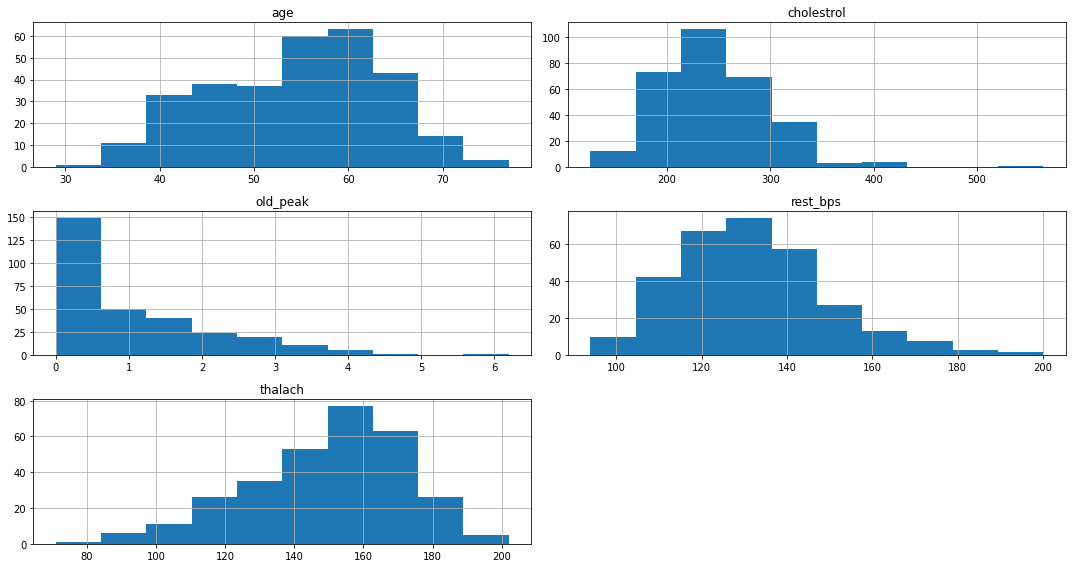

In [15]:
# plot the histogram of numeric independent variables
# the hist() function considers the numeric variables only, by default
df_features.hist()

# adjust the subplots
plt.tight_layout()

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> It can be seen that the variable 'old_peak' is right-skewed and variables 'cholestrol' and 'rest_bps' have slight right skew, but not a very long right tail. They are almost near normally distrubuted. Only the variable 'thalach' is slightly left-skewed. <br> <br> 
                        The variable which is near normally distributed is 'age'.<br><br>  
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 2. Distribution of categoric independent variables.

For the independent categoric variables, we plot the bar plot to check the distribution of each variables.

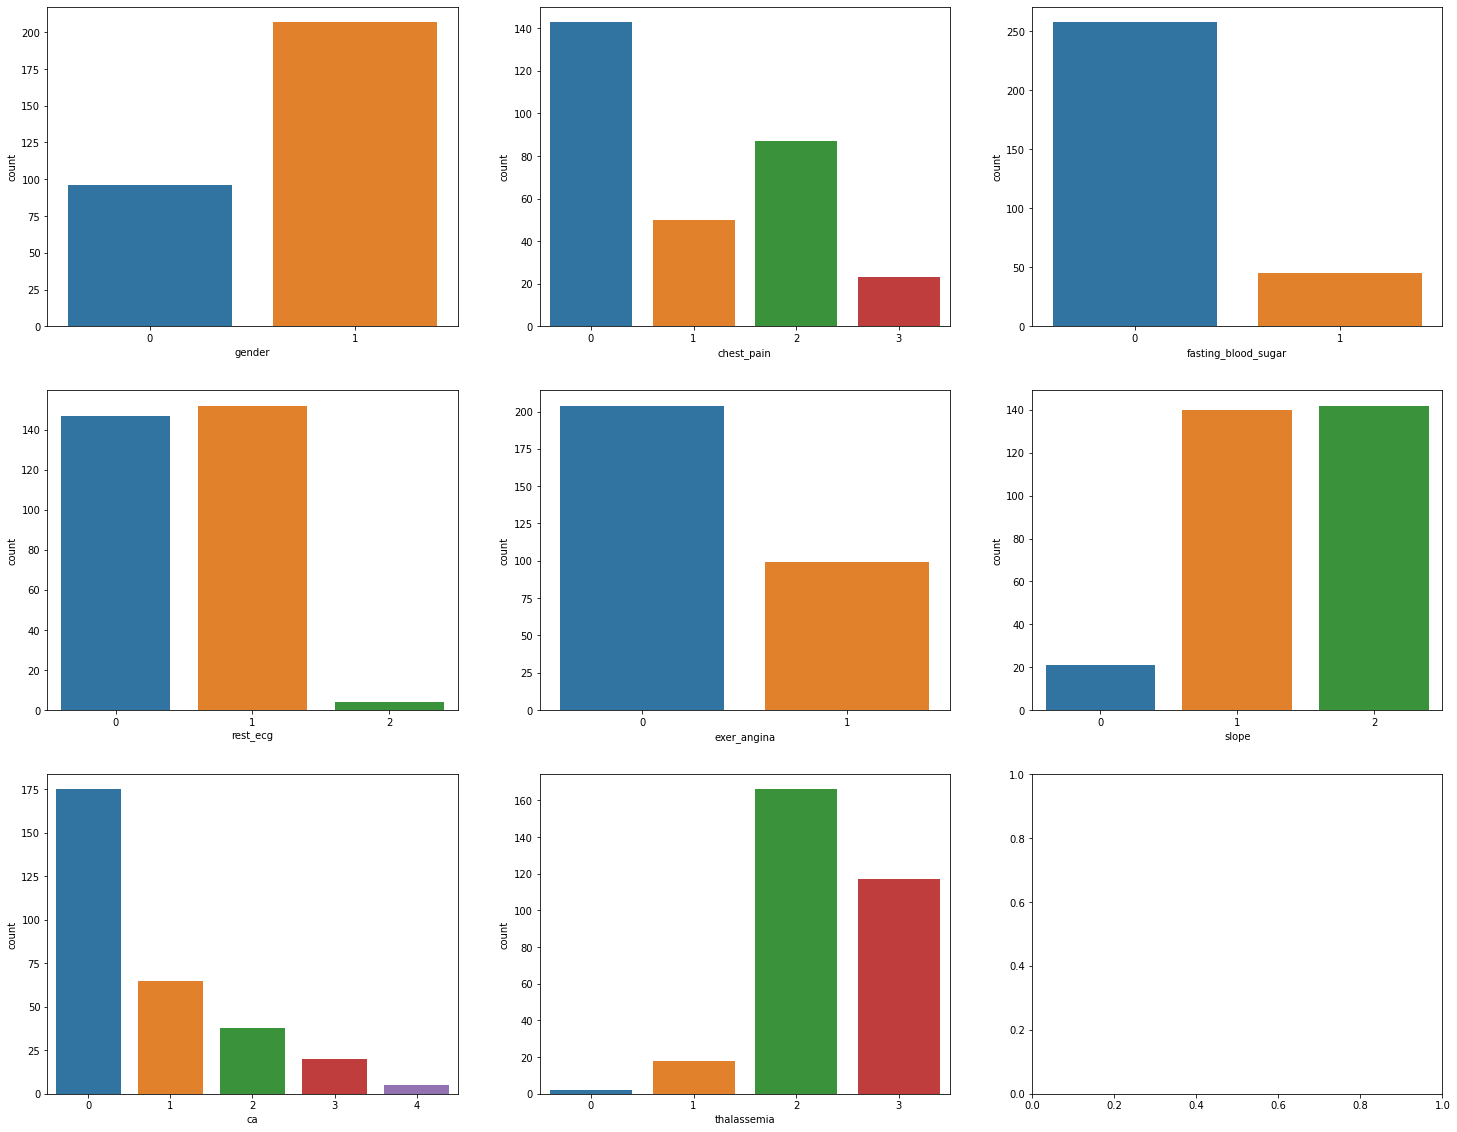

In [16]:
# create a list of all categorical variables
# initiate an empty list to store the categorical variables
categorical=[]

# use for loop to check the data type of each variable
for column in df_features:
    
    # use 'if' statement with condition to check the categorical type 
    if is_string_dtype(df_features[column]):
        
        # append the variables with 'categoric' data type in the list 'categorical'
        categorical.append(column)

# plot the count plot for each categorical variable 
# set the number of rows in the subplot using the parameter, 'nrows'
# set the number of columns in the subplot using the parameter, 'ncols'
# 'figsize' sets the figure size
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(25, 20))

# use for loop to plot the count plot for each variable
for variable, subplot in zip(categorical, ax.flatten()):
    
    # use countplot() to plot the graph
    # pass the axes for the plot to the parameter, 'ax'
    sns.countplot(df_Heart[variable], ax = subplot)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The variable 'ca' has 5 categories, variable 'chest_pain' and 'thalassemia' have 4 categories each, variables 'rest_ecg' and 'slope' have 3 categories each whereas the remaining variables have only two categories.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### 3. Distribution of dependent variable.

In section 4.1.1, we have split the dependent variable (target) and created a dataframe 'df_target'. Use this dataframe to check the distribution of target.

In [17]:
# get counts of 0's and 1's in the 'target' variable using 'value_counts()'
# store the values in 'class_frequency'
class_frequency = df_target.target.value_counts()
class_frequency

1    165
0    138
Name: target, dtype: int64

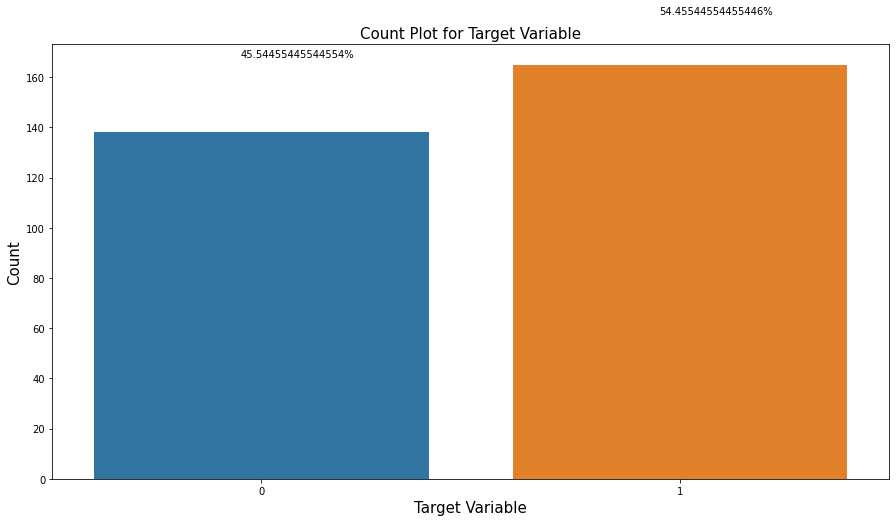

In [18]:
# plot the countplot of the variable 'target'
sns.countplot(x = df_target.target)

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text on the plot
plt.text(x = -0.05, y = df_target.target.value_counts()[0] + 30, s = str((class_frequency[0])*100/len(df_target.target)) + '%')
plt.text(x = 0.95, y = df_target.target.value_counts()[1] +20, s = str((class_frequency[1])*100/len(df_target.target)) + '%')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Count Plot for Target Variable', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# to show the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>There are a total of 138 patients who do not have the disease, and 165 patients are affected by the Heart disease. We see that there is a balance between the two classes of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='correlation'></a>
### 4.1.4 Correlation

Correlation is a statistic that measures the degree to which two variables move with each other. A correlation coefficient near  1  indicates the strong relationship between them; a weak correlation indicates the extent to which one variable increases as the other decreases. Correlation among multiple variables can be represented in the form of a matrix. This allows us to see which variables are correlated.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> To check the correlation between numerical variables, we perform the following steps:<br><br>
                    1. Compute a correlation matrix  <br>
                    2. Plot a heatmap for the correlation matrix
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Compute a correlation matrix**

In [19]:
# use the corr() function to generate the correlation matrix of the numeric variables
corr = df_features.corr()

# print the correlation matrix
corr

,age,rest_bps,cholestrol,thalach,old_peak
age,1.000000,0.279351,0.213678,-0.398522,0.210013
rest_bps,0.279351,1.000000,0.123174,-0.046698,0.193216
cholestrol,0.213678,0.123174,1.000000,-0.009940,0.053952
thalach,-0.398522,-0.046698,-0.009940,1.000000,-0.344187
old_peak,0.210013,0.193216,0.053952,-0.344187,1.000000


**2. Plot the heatmap for the diagonal correlation matrix**

A correlation matrix is a symmetric matrix. Plot only the lower triangular entries using a heatmap.

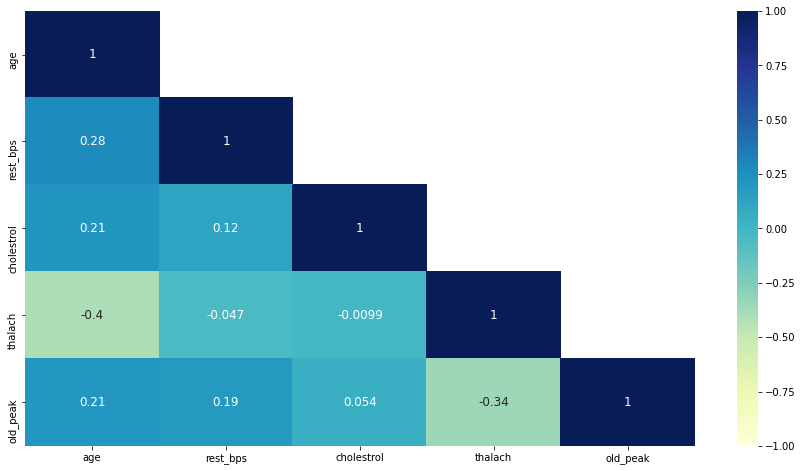

In [20]:
# use 'mask' to plot a lower triangular correlation matrix 
# 'triu_indices_from' returns the indices for the upper-triangle of matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True

# plot the heat map
# corr: give the correlation matrix
# cmap: color code used for plotting
# vmax: gives a maximum range of values for the chart
# vmin: gives a minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# mask: mask the upper traingular matrix values
sns.heatmap(corr, cmap = 'YlGnBu', vmax = 1.0, vmin = -1.0, annot = True, annot_kws = {"size": 12}, mask = mask)

# display the plot
plt.show()

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above heatmap, it can seen that the continuous variables are not highly correlated with each other since all the correlation coefficients are less than close to 0.5. The maximum positive correlation is 0.28 between 'age' and 'rest_bps'. Variable 'thalach' has a moderate negative correlation with variables 'age' (-0.4) and 'old_peak'(-0.34).  It can be concluded that there is no multicollinearity in the data.<br><br>
Note: The diagonal values are always 1 because it is the correlation of the variable with itself.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Correlation does not imply causation. In other words, if two variables are correlated, it does not mean that one variable caused the other.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:</b> <br><br>
                    <a href="https://bit.ly/2PBvA8T">Why correlation does not imply causation </a>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id='outliers'></a>
### 4.1.5 Discover Outliers 

#### Importance of detecting an outlier
An outlier is an observation that appears to deviate distinctly from other observations in the data. If the outliers are not removed, the model accuracy may decrease.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To detect outliers in numeric data, we perform the following:<br><br>
                    1. Plot the boxplot for numeric data<br>
                    2. Note the variables in which outliers are present<br>
                    3. Remove outliers by IQR method<br> 
                    4. Plot the boxplot to recheck for outliers</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Plot the boxplot for numeric data**

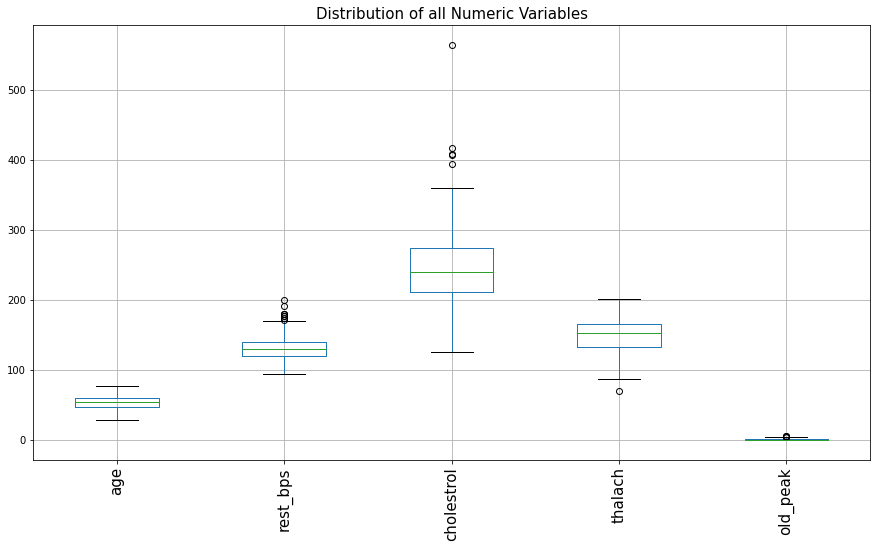

In [21]:
# plot a boxplot to visualize the outliers in all the numeric variables
df_features.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**Notice that the variables 'age' , 'old_peak' has a quite small range as compared to the other variables. Thus, it is difficult to see the outliers for these variables. So, we plot the boxplot only for the variables 'age', 'old_peak'.**

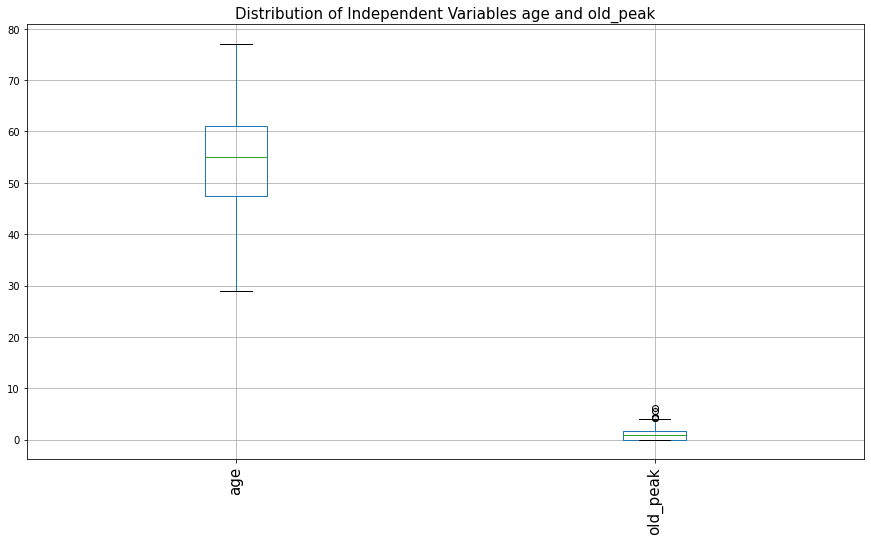

In [22]:
# make a list of numerical features 
cols = [ 'age','old_peak']

# plot multiple boxplots
df_features[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables age and old_peak', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

**2. Note the variables for which outliers are present**

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>From the above plot, we notice that for the variables 'rest_bps', 'cholestrol','thalach' and 'old_peak' there are points above the upper extreme or below the lower extreme - these points are outliers in the data. However, the exact location of these points is not precisely seen.<br><br>
                        Let us use the IQR method to remove the outliers.<br><br>
                        Note: The variables have not been scaled. Thus the boxplots are not visualized efficiently.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Outliers can also be detected using the standard deviation method if we know that the distribution of values in the sample is Gaussian or Gaussian-like.</b> 
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>I love to know more:  </b><a href="https://bit.ly/33bgNpq">How to use statistics to identify outliers in data</a>
</font>
            </div>
        </td>
    </tr>
</table>



**3. Remove outliers by IQR method**

In [23]:
# calculate the first quartile
Q1 = df_features.quantile(0.25)

# calculate the third quartile
Q3 = df_features.quantile(0.75)

# Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR
IQR = Q3 - Q1

# print the IQR
print(IQR)

age           13.5
rest_bps      20.0
cholestrol    63.5
thalach       32.5
old_peak       1.6
dtype: float64


In [24]:
# remove the outliers from the dataframe 'df_Heart'
# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df_Heart = df_Heart[~((df_Heart < (Q1 - 1.5 * IQR)) | (df_Heart > (Q3 + 1.5 * IQR))).any(axis=1)]

# reset the index of the dataframe without outliers
df_Heart = df_Heart.reset_index(drop = True)

To confirm that the outliers have been removed; let us visualize the boxplot again.

**4. Plot the boxplot to recheck for outliers**

We plot the boxplots for all variables except for the variable `white corpuscle` for better visualization.

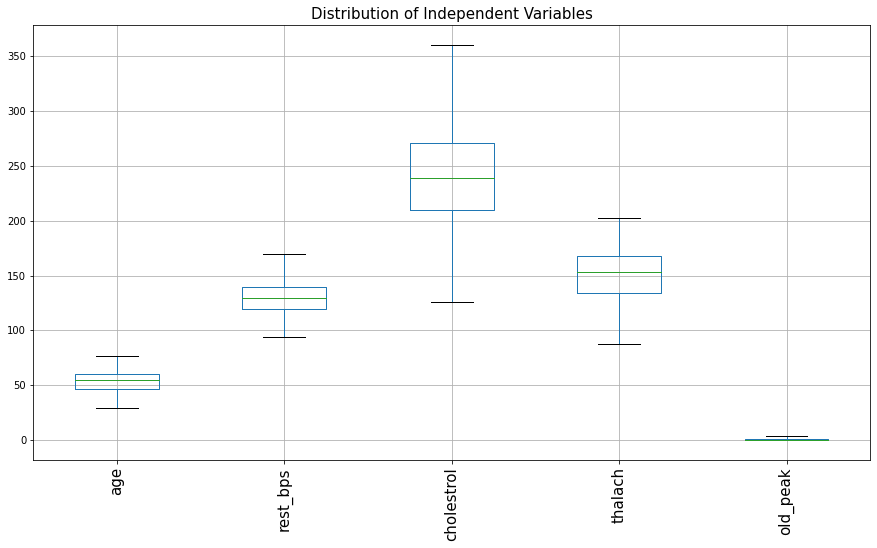

In [25]:
# make a list of numerical features without considering the 'white corpuscle'
cols = ['age','rest_bps','cholestrol','thalach','old_peak']

# plot multiple boxplots
df_Heart[cols].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

Observing the range of the boxplot, we say that the outliers are removed from the original data.

It is up to the discretion of the data scientist, to remove them or not; and maybe decide after evaluating the model performance. 

A crude way to know whether the outliers have been removed or not is to check the dimensions of the data. If the dimensions are reduced that implies outliers are removed.

In [26]:
# check the shape of the data after removal of outliers 
df_Heart.shape

(284, 14)

<table align="left">
    <tr>
        <td width="8%">
           <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The output shows a reduction in the number of rows. Thus we may say that the potential outliers have been removed.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Missing_Values'></a>
### 4.1.6 Missing Values

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>First, run a check for the presence of missing values and their percentage for each column. Then choose the right approach to remove them.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [27]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df_Heart.isnull().sum().sort_values(ascending = False)          

# calculate the percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df_Heart.isnull().sum()*100/df_Heart.isnull().count()).sort_values(ascending = False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
target,0,0.0
thalassemia,0,0.0
ca,0,0.0
slope,0,0.0
old_peak,0,0.0
exer_angina,0,0.0
thalach,0,0.0
rest_ecg,0,0.0
fasting_blood_sugar,0,0.0
cholestrol,0,0.0


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>None of the variables contain the missing values.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Another way to find the missing values is to plot a heatmap for visualization.

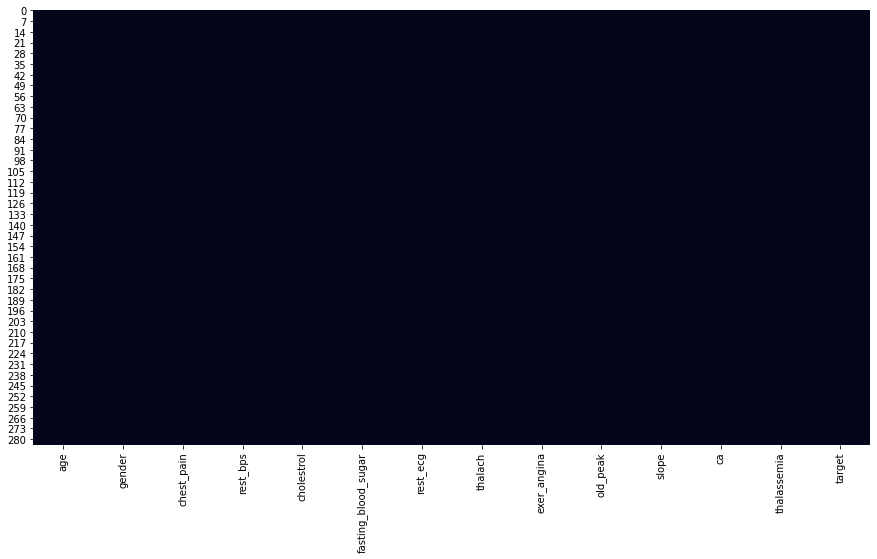

In [28]:
# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df_Heart.isnull(), cbar=False)

# display the plot
plt.show()

There are no horizontal lines in the heatmap which would correspond to a probable missing values.

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The above output shows that there are no missing values in the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How to deal with missing data?<br><br>


Drop data<br>
a. Drop the whole row<br>
b. Drop the whole column<br><br>

Replace data<br>

a. Replace it by mean<br>

b. Replace it by frequency<br>
c. Replace it based on other functions<br><br>

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing the method to replace the data.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='Data_Preparation'></a>
## 4.2 Prepare the Data

To build the classification models, we need to encode the categorical variables using dummy encoding.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> 
                  To dummy encode, we do the following: <br><br>
                    1. Filter numerical and categorical variables<br>
                    2. Dummy encode the categorical variables<br>
                    3. Concatenate numerical and dummy encoded categorical variables</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Filter numerical and categorical variables **

In [29]:
# dataframe with categorical features
# 'categorical' contains a list of categorical variables
df_cat = df_Heart[categorical]

# dataframe with numerical features
# use 'drop()' to drop the categorical variables
# 'axis = 1' drops the corresponding column(s)
df_num = df_Heart.drop(categorical, axis = 1)

**2. Dummy encode the categorical variables**

In [30]:
# print the first five observations of the 'df_cat'
df_cat.head()

,gender,chest_pain,fasting_blood_sugar,rest_ecg,exer_angina,slope,ca,thalassemia
0,1,3,1,0,0,0,0,1
1,1,2,0,1,0,0,0,2
2,0,1,0,0,0,2,0,2
3,1,1,0,1,0,2,0,2
4,0,0,0,1,1,2,0,2


In [31]:
# use 'get_dummies()' from pandas to create dummy variables
# use 'drop_first = True' to create (n-1) dummy variables
df_cat_dummies = pd.get_dummies(df_cat, drop_first = True)

In [32]:
# check the first five observations of the data with dummy encoded variables
df_cat_dummies.head()

,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


**3. Concatenate numerical and dummy encoded categorical variables**

In [33]:
# concat the dummy variables with numeric features to create a dataframe of all independent variables
# 'axis=1' concats the dataframes along columns 
df_Heart_dummy = pd.concat([df_num, df_cat_dummies], axis=1)

# display first five observations of the dummy dataframe
df_Heart_dummy.head()

,age,rest_bps,cholestrol,thalach,old_peak,target,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


After removal of outliers and missing values in the data, the dataframe `df_Heart_dummy` contains independent as well as dependent variables.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Split the dependent variable (target) from the dataframe 'df_Heart_dummy'.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [34]:
# select only the target variable 'target' and store it in dataframe 'y'
y = pd.DataFrame(df_Heart_dummy['target'])

Now, use this 'y' as a target variable to build the classification models.

In [35]:
# use 'drop()' to remove the variable 'target' from df_target_dummy
# 'axis = 1' drops the corresponding column(s)
X = df_Heart_dummy.drop('target',axis = 1)

In [36]:
# check the first five observations of X
X.head()

,age,rest_bps,cholestrol,thalach,old_peak,gender_1,chest_pain_1,chest_pain_2,chest_pain_3,fasting_blood_sugar_1,rest_ecg_1,rest_ecg_2,exer_angina_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thalassemia_1,thalassemia_2,thalassemia_3
0,63,145,233,150,2.3,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0


Use this 'X' as a set of predictors to build the classification models.

#### Create a generalized function to calculate the metrics for the test set.

In [37]:
# create a generalized function to calculate the metrics values for test set
def get_test_report(model):
    
    # return the performace measures on test set
    return(classification_report(y_test, y_pred))

#### Create a generalized function to calculate the kappa score for the test set.

In [38]:
# create a generalized function to calculate the metrics values for test set
def kappa_score(model):
    
    # return the kappa score on test set
    return(cohen_kappa_score(y_test, y_pred))

#### Define a function to plot the confusion matrix.

In [39]:
# define a to plot a confusion matrix for the model
def plot_confusion_matrix(model):
    
    # create a confusion matrix
    # pass the actual and predicted target values to the confusion_matrix()
    cm = confusion_matrix(y_test, y_pred)

    # label the confusion matrix  
    # pass the matrix as 'data'
    # pass the required column names to the parameter, 'columns'
    # pass the required row names to the parameter, 'index'
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])

    # plot a heatmap to visualize the confusion matrix
    # 'annot' prints the value of each grid 
    # 'fmt = d' returns the integer value in each grid
    # 'cmap' assigns color to each grid
    # as we do not require different colors for each grid in the heatmap,
    # use 'ListedColormap' to assign the specified color to the grid
    # 'cbar = False' will not return the color bar to the right side of the heatmap
    # 'linewidths' assigns the width to the line that divides each grid
    # 'annot_kws = {'size':25})' assigns the font size of the annotated text 
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})

    # set the font size of x-axis ticks using 'fontsize'
    plt.xticks(fontsize = 20)

    # set the font size of y-axis ticks using 'fontsize'
    plt.yticks(fontsize = 20)

    # display the plot
    plt.show()

#### Define a function to plot the ROC curve.

In [40]:
# define a function to plot the ROC curve and print the ROC-AUC score
def plot_roc(model):
    
    # the roc_curve() returns the values for false positive rate, true positive rate and threshold
    # pass the actual target values and predicted probabilities to the function
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # plot the ROC curve
    plt.plot(fpr, tpr)

    # set limits for x and y axes
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])

    # plot the straight line showing worst prediction for the model
    plt.plot([0, 1], [0, 1],'r--')

    # add plot and axes labels
    # set text size using 'fontsize'
    plt.title('ROC Curve for Heart Disease Classifier', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

    # add the AUC score to the plot
    # 'x' and 'y' gives position of the text
    # 's' is the text 
    # use round() to round-off the AUC score upto 4 digits
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))

    # plot the grid
    plt.grid(True)

#### Create a generalized function to create a dataframe containing the scores for the models.

In [41]:
# create an empty dataframe to store the scores for various classification algorithms
score_card = pd.DataFrame(columns=['Model', 'AUC Score', 'Precision Score', 'Recall Score', 'Accuracy Score',
                                   'Kappa Score', 'f1-score'])

# append the result table for all performance scores
# performance measures considered for comparision are 'AUC', 'Precision', 'Recall','Accuracy','Kappa Score', and 'f1-score'
# compile the required information in a user defined function 
def update_score_card(model_name):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model': model_name,
                                    'AUC Score' : roc_auc_score(y_test, y_pred_prob),
                                    'Precision Score': metrics.precision_score(y_test, y_pred),
                                    'Recall Score': metrics.recall_score(y_test, y_pred),
                                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                                    'f1-score': metrics.f1_score(y_test, y_pred)}, 
                                    ignore_index = True)
    return(score_card)

<a id='DecisionTree'> </a>
# 5. Decision Tree

Decision Tree is a non-parametric supervised learning method. It builds a regression model in the form of a tree structure. It breaks down a data set into smaller and smaller subsets, which is called splitting. The final result is a tree with a decision and leaf nodes. A decision node has two or more branches. The leaf node represents a class or decision. The topmost decision node in a tree that corresponds to the best predictor called 'root node'. The decision tree is built using different criteria like gini index, and entropy. 

 
<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> I love to know more:<br>
                        1. <a href="https://bit.ly/3534vQ7"> Understanding Decision Trees</a></b>
                </font>
            </div>
        </td>
    </tr>
</table>

<a id='DecisionTreeWFS'> </a>
## 5.1 Decision Tree 

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build a Decision Tree, we do the following: <br><br>
                       1. Split the data into training and test sets<br> 
                       2. Build the model <br>
                       3. Plot the decision tree<br>
                       4. Do predictions on the test set <br>
                       5. Compute accuracy measures <br>
                       6. Tabulate the results
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

**1. Split the data into training and test sets**

In [42]:
# split data into train subset and test subset
# set 'random_state' to generate the same dataset each time you run the code 
# 'test_size' returns the proportion of data to be included in the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print("X_train",X_train.shape)
print("y_train",y_train.shape)

# print dimension of test set
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (198, 22)
y_train (198, 1)
X_test (86, 22)
y_test (86, 1)


**2. Build the model**

<table align="left">
    <tr>
        <td width="8%">
            <img src="quicktip.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>To build the decision tree, we used the criterion of 'entropy'. Entropy is one of the criteria used to build the decision tree. It calculates the homogeneity of the sample. The entropy is zero if the sample is completely homogeneous, and it is equal to 1 if the sample is equally divided.
</b> 
                </font>
            </div>
        </td>
    </tr>
</table>



We build the decision tree on the `unscaled features`.

In [43]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 10)

# fit the model using fit() on train data
decision_tree_model = decision_tree.fit(X_train, y_train)

#### 3. Plot the decision tree

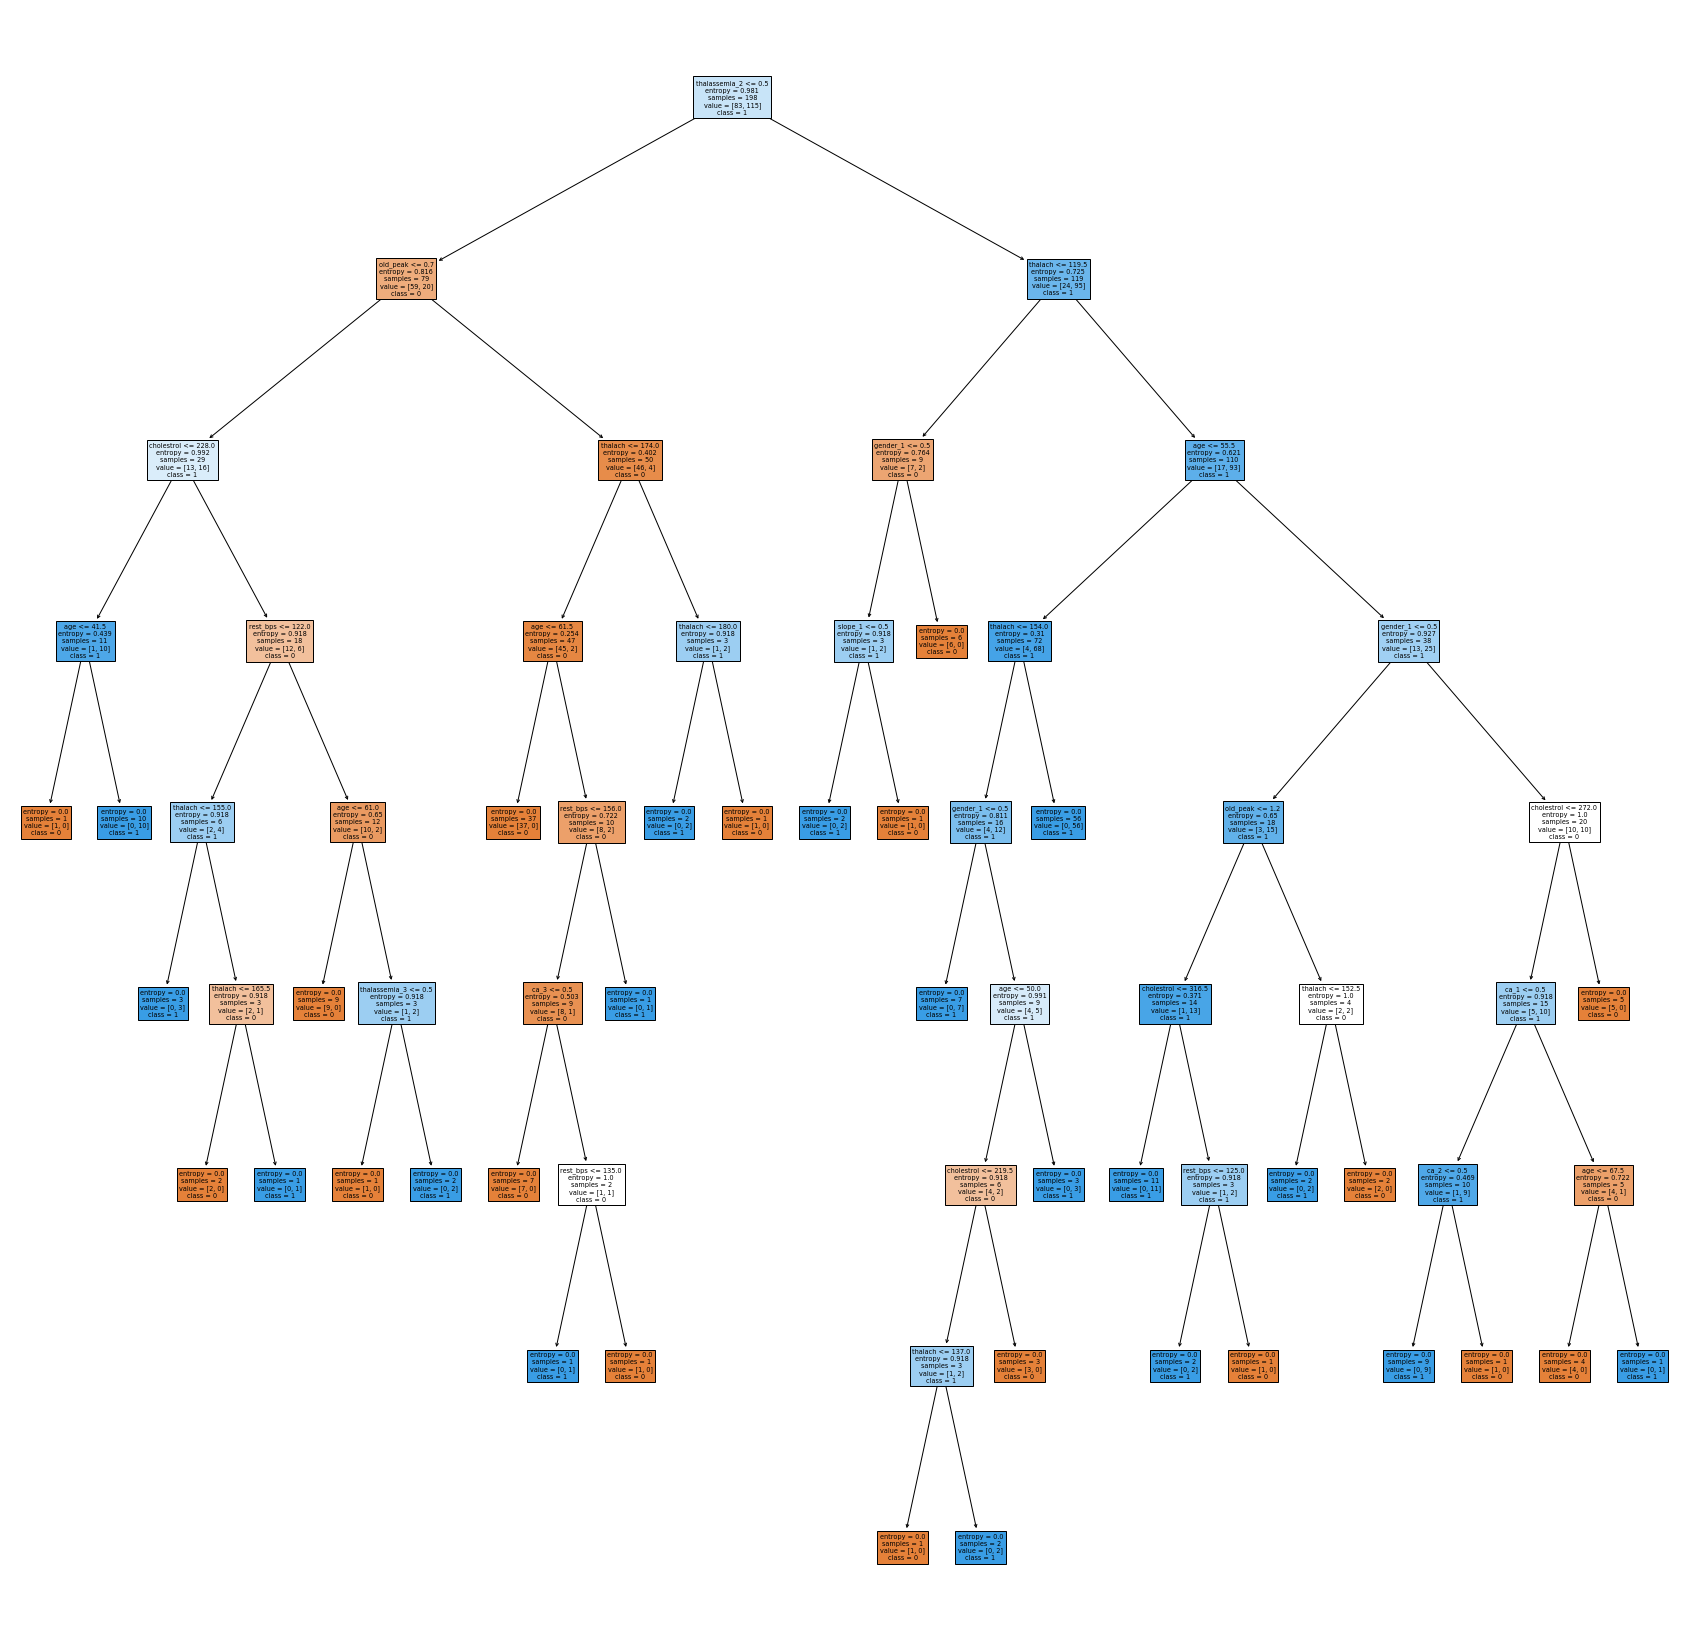

In [44]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

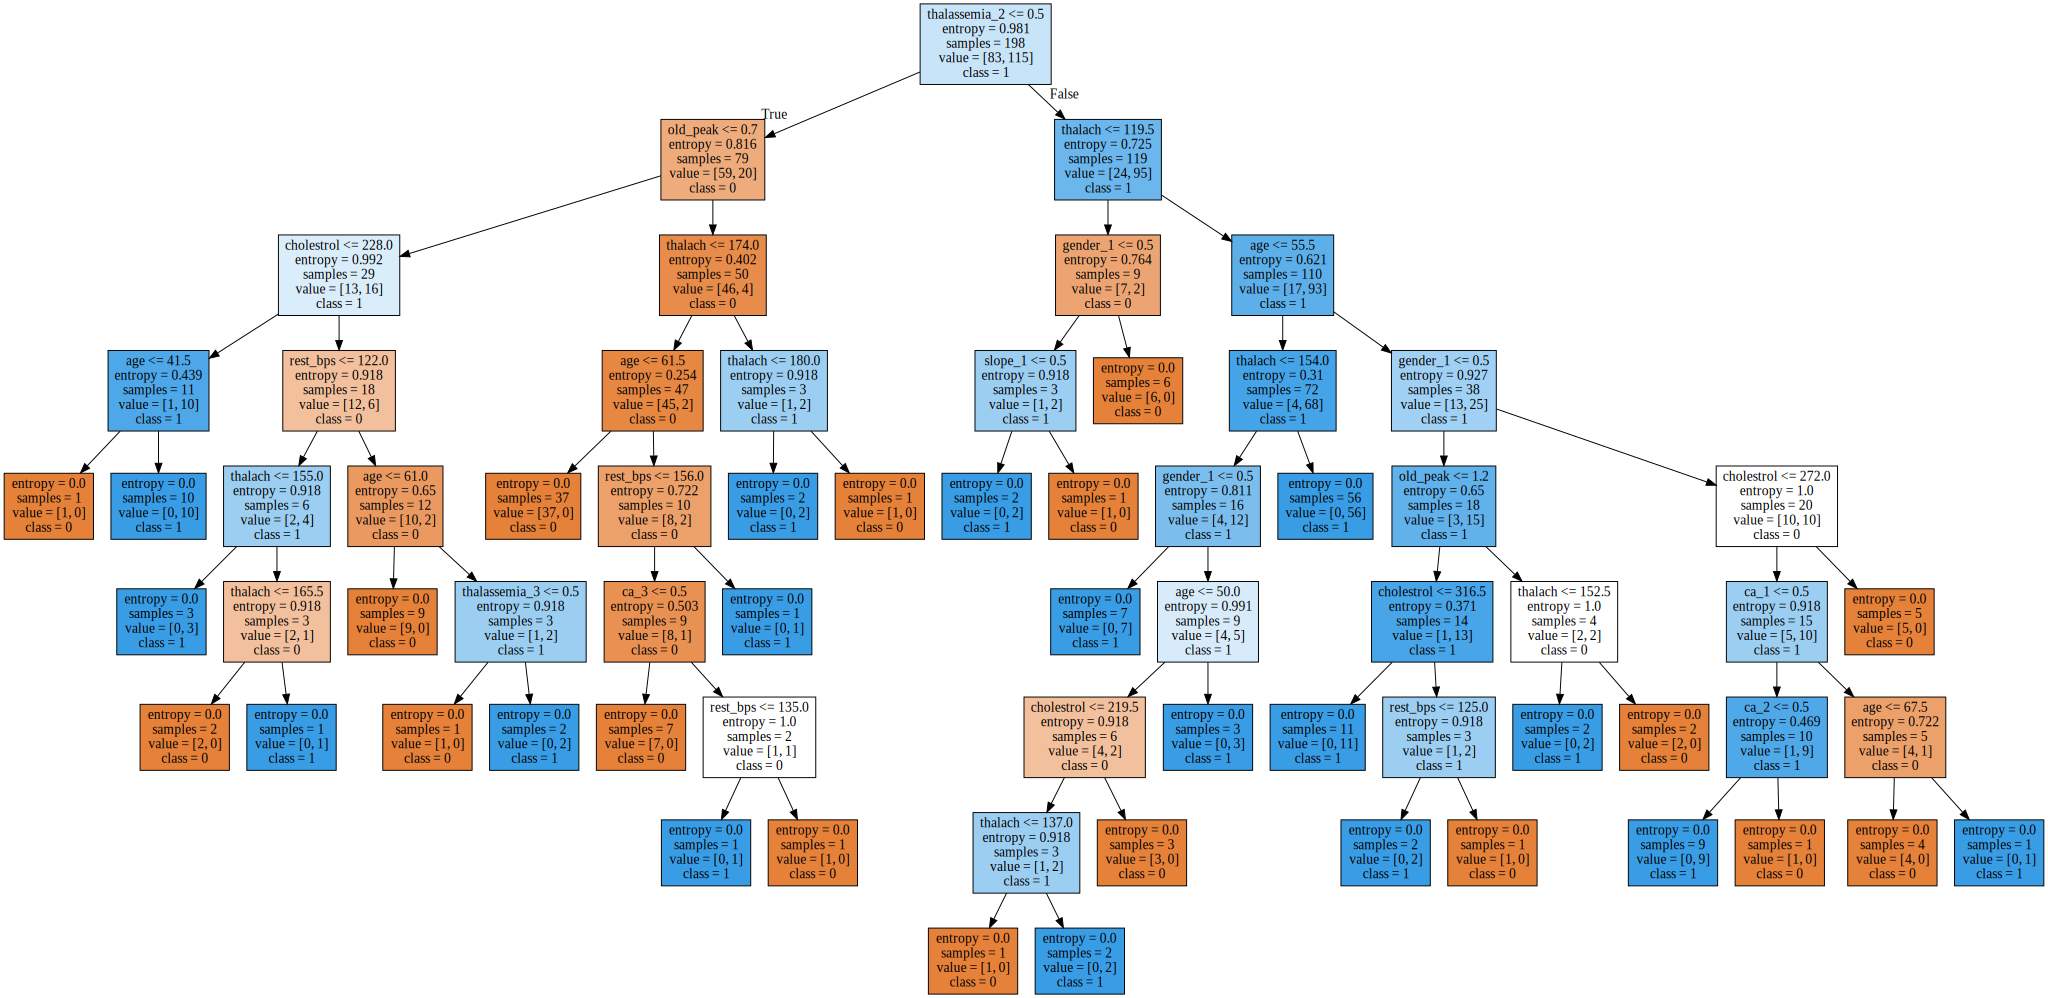

In [100]:
# DOT data
dot_data = tree.export_graphviz(decision_tree_model, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


**4. Do predictions on the test set**

In [45]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_model.predict_proba(X_test)[:,1]

In [46]:
# predict the class labels using 'X_test'
y_pred = decision_tree_model.predict(X_test)

**5. Compute accuracy measures**

#### Build a confusion matrix.

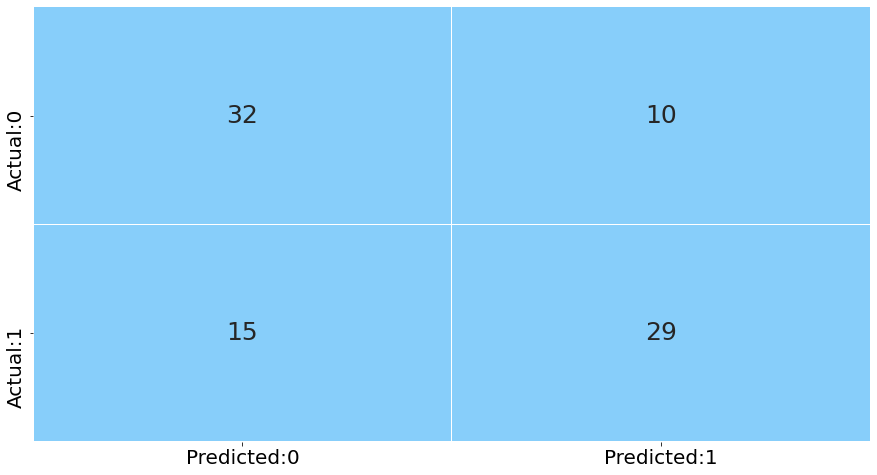

In [47]:
# call the function to plot the confusion matrix
# pass the decision tree model to the function
plot_confusion_matrix(decision_tree_model)

**Calculate performance measures on the test set.**

In [48]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree model to the function
test_report = get_test_report(decision_tree_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.68      0.76      0.72        42
           1       0.74      0.66      0.70        44

    accuracy                           0.71        86
   macro avg       0.71      0.71      0.71        86
weighted avg       0.71      0.71      0.71        86



**Interpretation:** The accuracy is 71% for this model. Also, the sensitivity and specificity of the model is quite different.

In [49]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree model to the function
kappa_value = kappa_score(decision_tree_model)

# print the kappa value
print(kappa_value)

0.41985968699406373


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4198, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

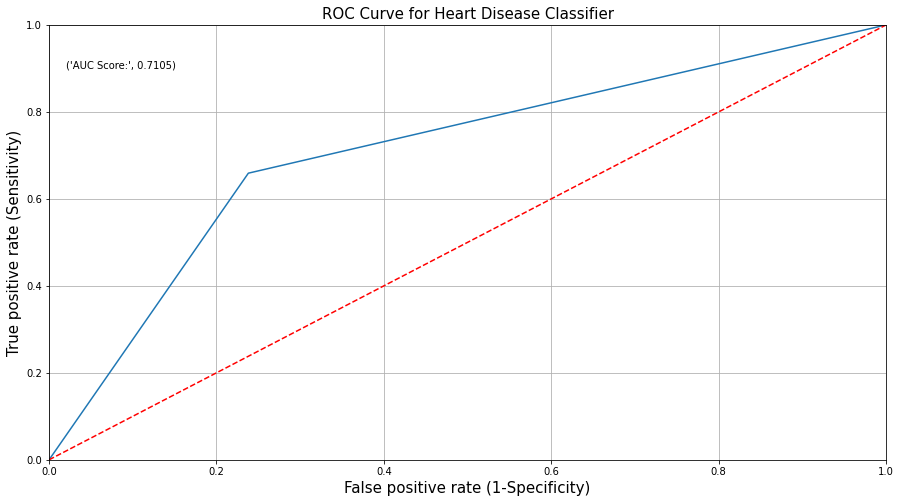

In [50]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree model to the function
plot_roc(decision_tree_model)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (decision tree) to be away from the dotted line with the AUC score 0.7105.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**7. Tabulate the results**

In [51]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree' as model name to the function
update_score_card(model_name = 'Decision Tree')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.74359,0.659091,0.709302,0.41986,0.698795


<a id='DecisionTreePruning'></a>
## 5.2 Prune a Decision Tree 

<table align="left">
    <tr>
        <td width="8%">
            <img src="alsoreadicon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Pruning reduces the size of the decision tree by removing the internal nodes of the tree. It decreases the complexity of the tree, and so improves the accuracy of prediction. It is useful because trees may fit the training data well, but may do a poor prediction on test data. A simpler tree often avoids over-fitting.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now prune the decision tree, we start with our original data set gradually proceeding with our analysis<br><br>
                        To prune a 'Decision Tree', we do the following:<br><br>
                        1. Prune the decision tree <br>
                        2. Plot the decision tree<br>
                        3. Do predictions on the test set <br>
                        4. Compute accuracy measures <br>
                        5. Tabulate the results 
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Prune the decision tree**

We prune the decision tree by specifying the maximum depth and maximum number of leaves of the tree. 

We use the unscaled features to build the tree.

In [52]:
# instantiate the 'DecisionTreeClassifier' object
# max_depth: maximum depth of the tree 
# max_leaf_nodes: maximum number of leaf nodes in the tree
# pass the 'random_state' to obtain the same samples for each time you run the code
prune = DecisionTreeClassifier(max_depth = 5, max_leaf_nodes = 25 , random_state = 10)

# fit the model using fit() on train data
decision_tree_prune = prune.fit(X_train, y_train)

#### 2. Plot the decision tree

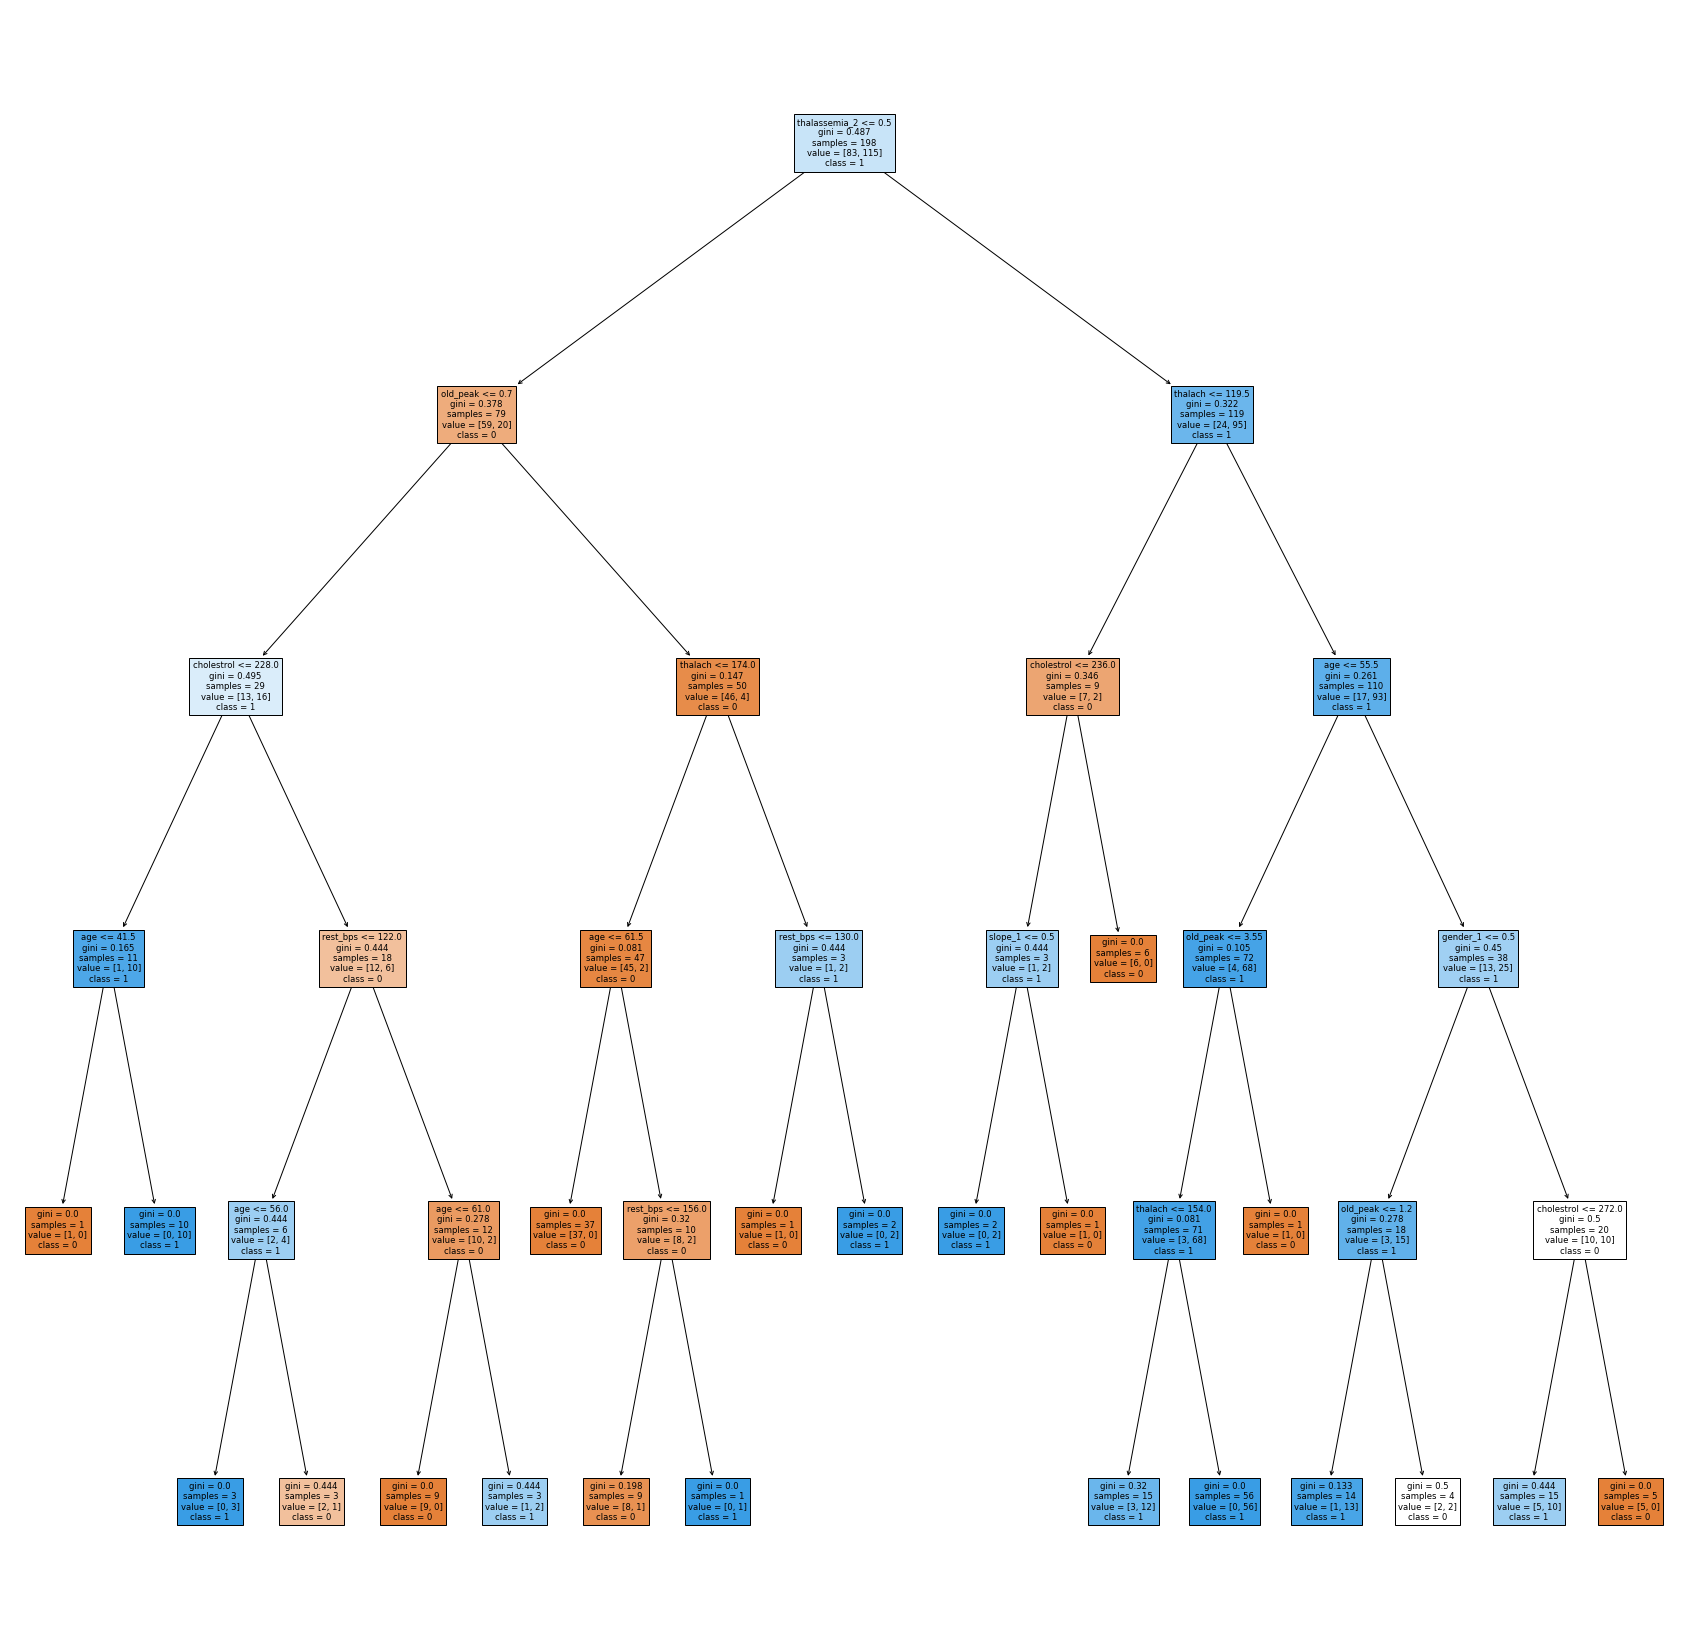

In [53]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(decision_tree_prune, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

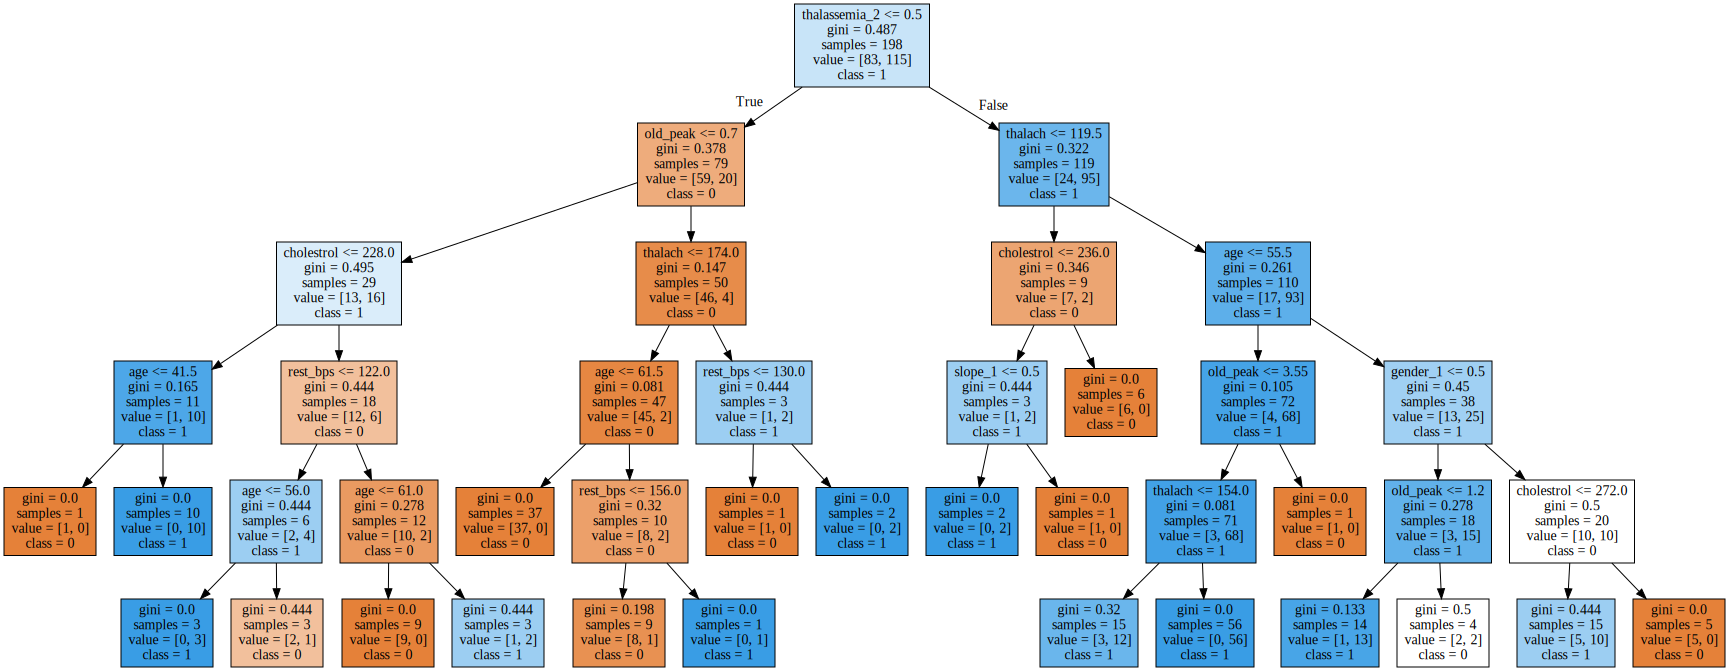

In [101]:
# DOT data
dot_data = tree.export_graphviz(decision_tree_prune, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


**3. Do predictions on the test set**

In [54]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = decision_tree_prune.predict_proba(X_test)[:,1]

In [55]:
# predict the class labels using 'X_test'
y_pred = decision_tree_prune.predict(X_test)

**4. Compute accuracy measures**

#### Build a confusion matrix.

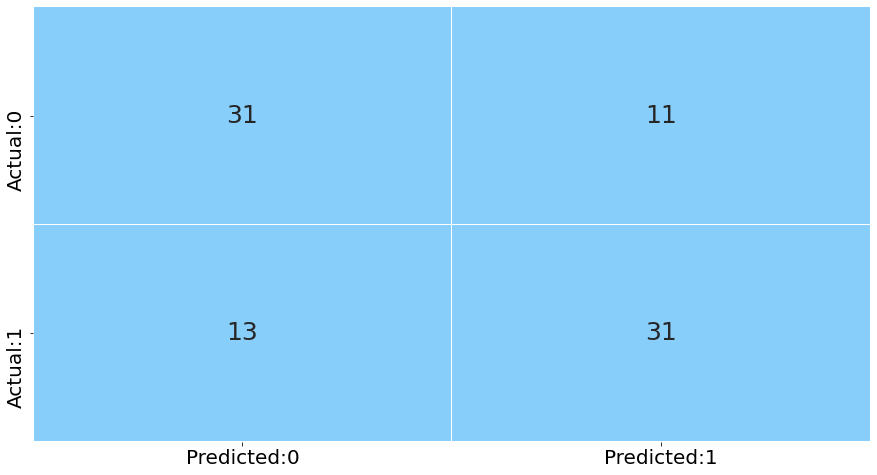

In [56]:
# call the function to plot the confusion matrix
# pass the decision tree (pruned) model to the function
plot_confusion_matrix(decision_tree_prune)

**Calculate performance measures on the test set.**

In [57]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (pruned) model to the function
test_report = get_test_report(decision_tree_prune)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.74      0.70      0.72        44

    accuracy                           0.72        86
   macro avg       0.72      0.72      0.72        86
weighted avg       0.72      0.72      0.72        86



**Interpretation:** The accuracy is 72% for this model.

In [58]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (pruned) model to the function
kappa_value = kappa_score(decision_tree_prune)

# print the kappa value
print(kappa_value)

0.4421621621621622


**Interpretation:** As the kappa score for the decision tree (pruned) is 0.4421, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

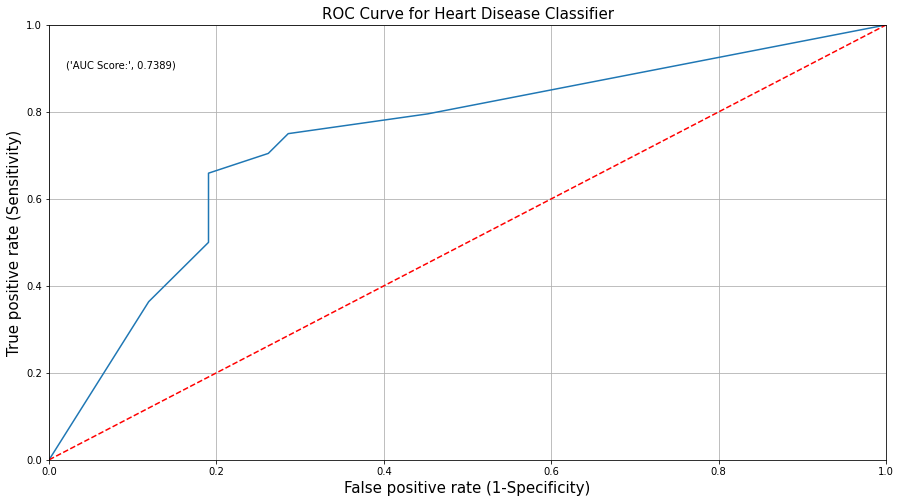

In [59]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (pruned) model to the function
plot_roc(decision_tree_prune)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (decision tree with pruning) to be away from the dotted line with the AUC score 0.7389.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



**5. Tabulate the results**

In [60]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (Pruned)' as model name to the function
update_score_card(model_name = 'Decision Tree (Pruned)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930


<a id='DecisionTreewithGridSearchCv'> </a>
## 5.3 Decision Tree (using GridSearchCV)

Now we show how a decision tree is optimized by cross-validation, which is done using the `GridSearchCV()` from sklearn library.

The performance of the selected hyperparameters and trained model is then measured on the test set that was not used during the model building.

<table align="left">
    <tr>
        <td width="8%">
            <img src="todo.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> Now we build a decision tree using the GridSearchCV. We start with our original data set gradually proceeding with our analysis<br><br>
                        To build a Decision Tree using GridSearchCV, we do the following:<br>
                        1. Use GridSearch to obtain the optimal values of hyperparameters <br>
                        2. Build the model using the hyperparameters obtained in step 1<br>
                        3. Plot the decision tree<br>
                        4. Do predictions on the test set <br>
                        5. Compute accuracy measures <br>
                        6. Tabulate the results
                      </b>
                </font>
            </div>
        </td>
    </tr>
</table>



**1. Use GridSearch to obtain the optimal values of hyperparameters**

In [61]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the list of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the list of values to 'max_depth' that assigns maximum depth of the tree
# pass the list of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the list of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
tuned_paramaters = [{'criterion': ['gini', 'entropy'],
                     'min_samples_split': [10, 20, 30],
                     'max_depth': [3, 5, 7, 9],
                     'min_samples_leaf': [15, 20, 25, 30, 35],
                     'max_leaf_nodes': [5, 10, 15, 20, 25]}]

In [62]:
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 10)

# fit the model on X_train and y_train using fit()
dt_grid = grid.fit(X_train, y_train)

# get the best parameters
print('Best parameters for decision tree classifier: ', dt_grid.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 25, 'min_samples_split': 10} 



**2. Build the model using the hyperparameters obtained in step 1**

In [63]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_grid_model = DecisionTreeClassifier(criterion = dt_grid.best_params_.get('criterion'),
                                       max_depth = dt_grid.best_params_.get('max_depth'),
                                       max_leaf_nodes = dt_grid.best_params_.get('max_leaf_nodes'),
                                       min_samples_leaf = dt_grid.best_params_.get('min_samples_leaf'),
                                       min_samples_split = dt_grid.best_params_.get('min_samples_split'),
                                       random_state = 10)

# use fit() to fit the model on the train set
dt_grid_model = dt_grid_model.fit(X_train, y_train)

#### 3. Plot the decision tree

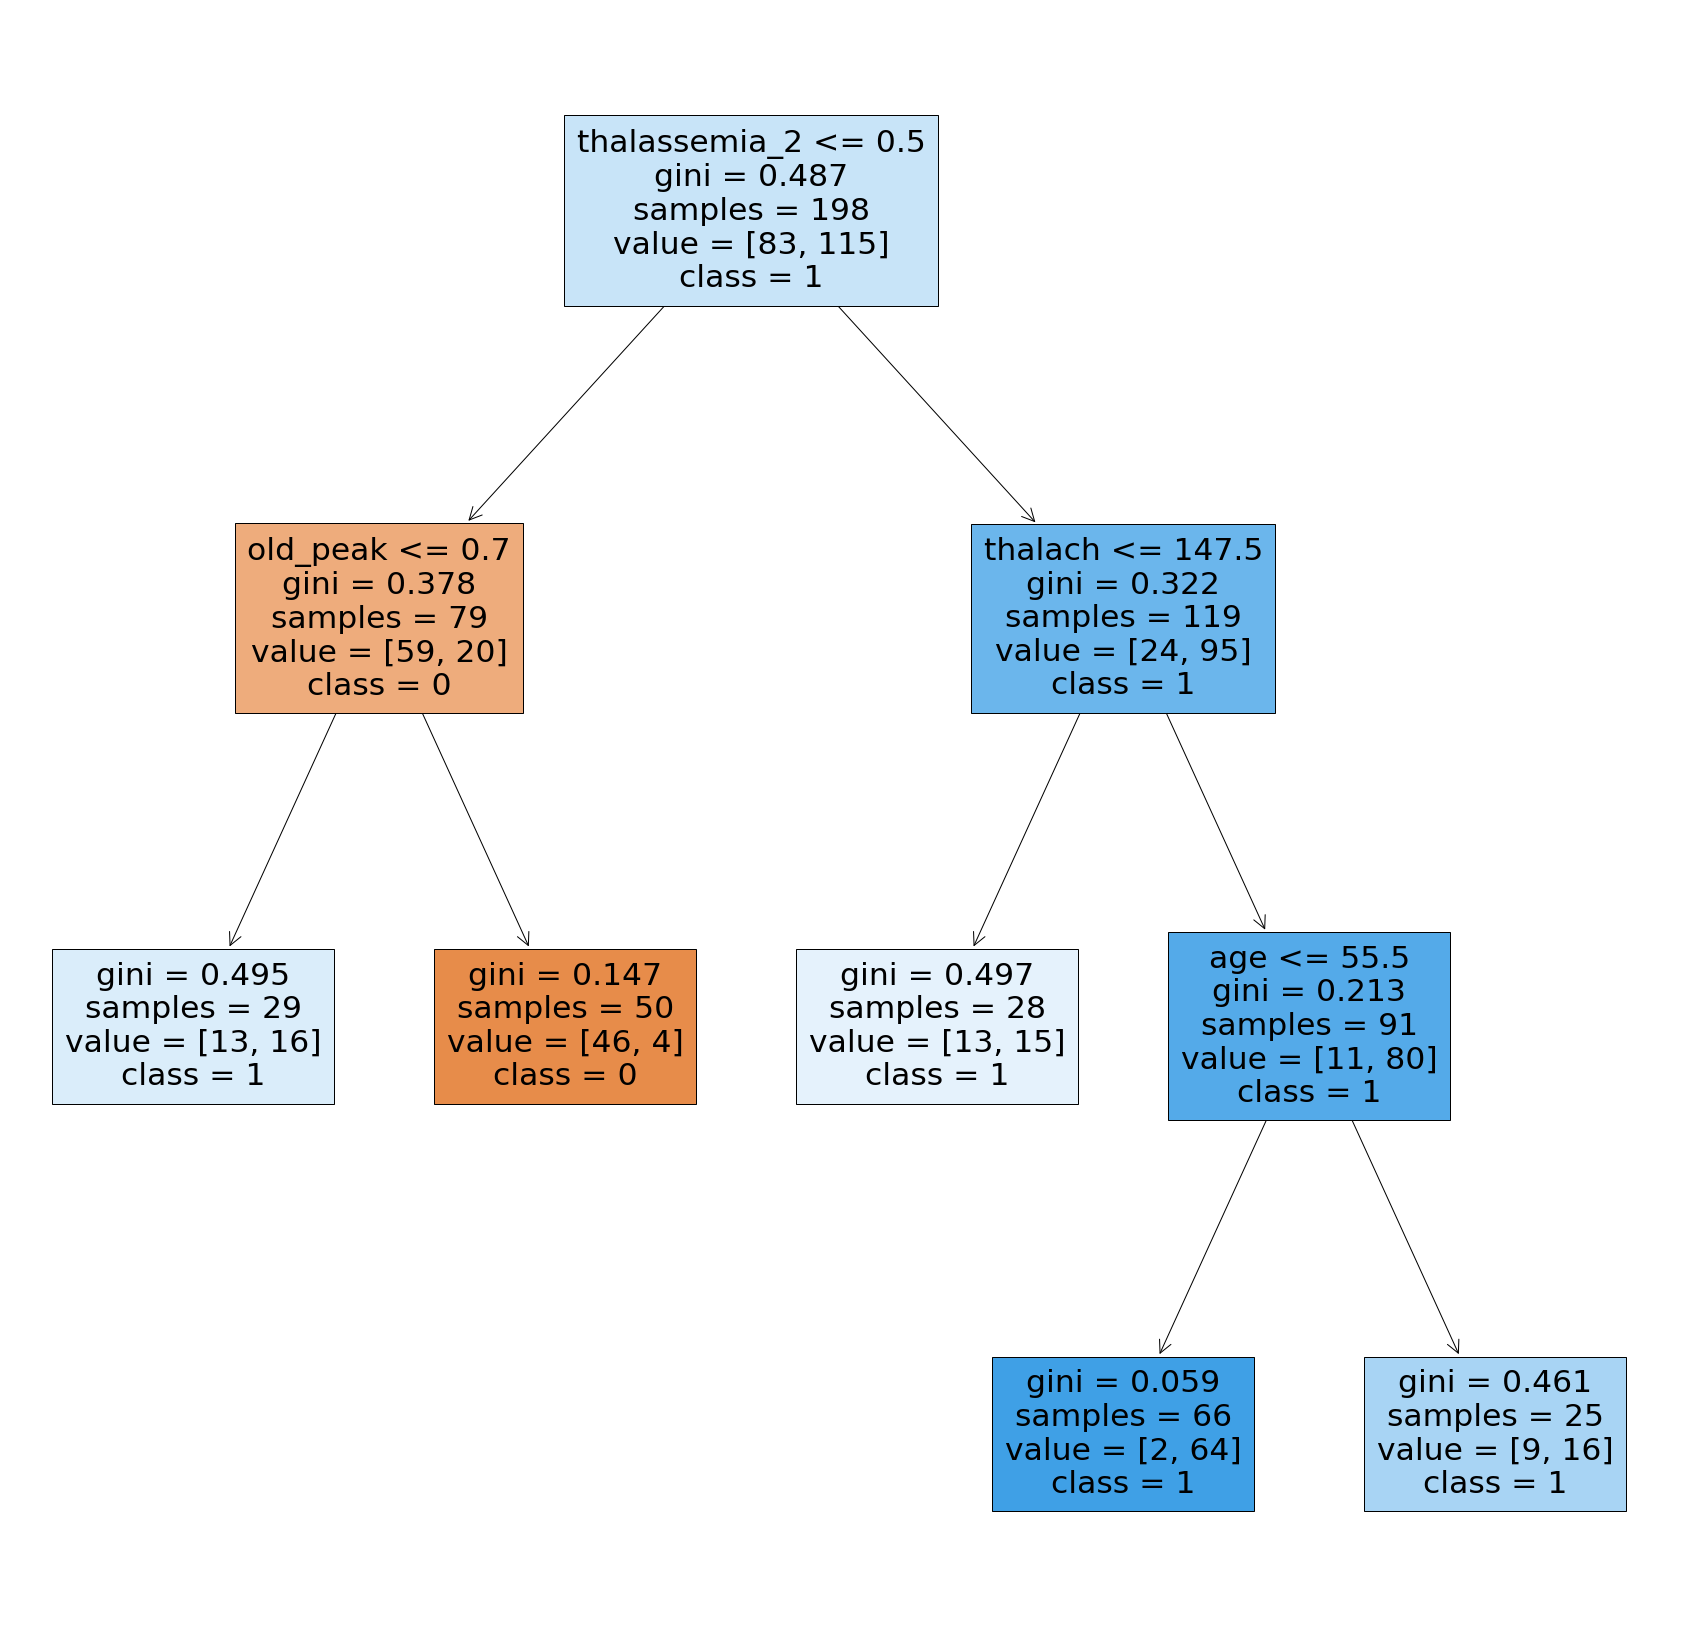

In [64]:
# save the column names in 'labels'
lables = X_train.columns

# plot the decision tree 
fig = plt.figure(figsize=(30,30))
_ = tree.plot_tree(dt_grid_model, 
                   feature_names=lables,  
                   class_names=["0","1"],
                   filled=True)

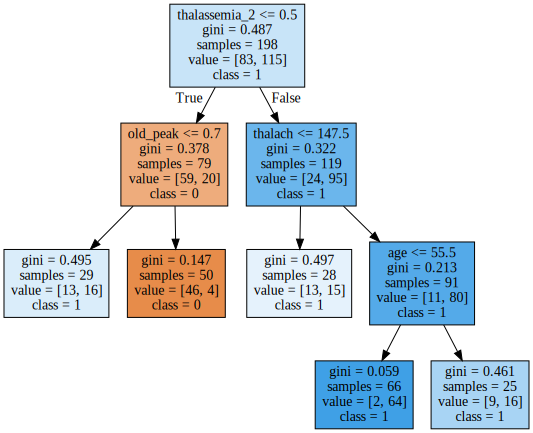

In [102]:
# DOT data
dot_data = tree.export_graphviz(dt_grid_model, out_file=None, 
                                feature_names=lables,  
                                class_names=["0","1"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph


**4. Do predictions on the test set**

In [65]:
# predict probabilities on the test set
# consider the probability of positive class by subsetting with '[:,1]'
y_pred_prob = dt_grid_model.predict_proba(X_test)[:,1]

In [66]:
# predict the class labels using 'X_test'
y_pred = dt_grid_model.predict(X_test)

**5. Compute accuracy measures**

#### Build a confusion matrix.

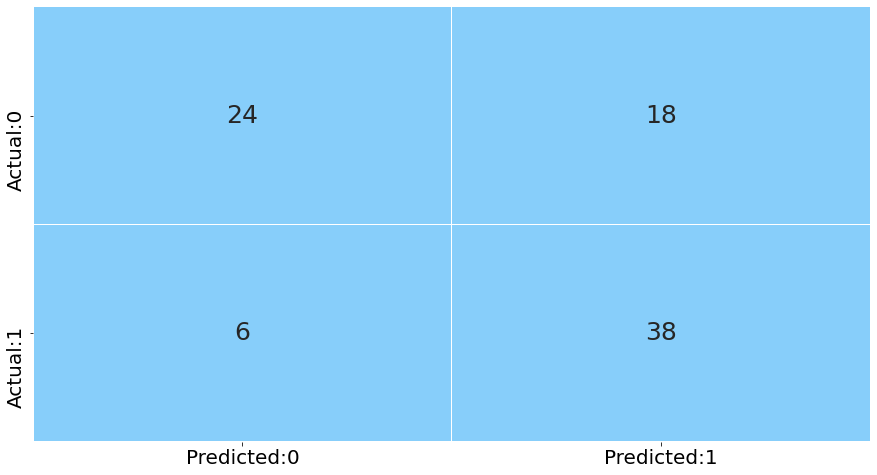

In [67]:
# call the function to plot the confusion matrix
# pass the decision tree (GridSearchCV) model to the function
plot_confusion_matrix(dt_grid_model)

**Calculate performance measures on the test set.**

In [68]:
# compute the performance measures on test data
# call the function 'get_test_report'
# pass the decision tree (GridSearchCV) model to the function
test_report = get_test_report(dt_grid_model)

# print the performace measures
print(test_report)

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        42
           1       0.68      0.86      0.76        44

    accuracy                           0.72        86
   macro avg       0.74      0.72      0.71        86
weighted avg       0.74      0.72      0.71        86



**Interpretation:** The accuracy is 72% for this model.

In [69]:
# compute kappa score on test set
# call the function 'kappa_score'
# pass the decision tree (GridSearchCV) model to the function
kappa_value = kappa_score(dt_grid_model)

# print the kappa value
print(kappa_value)

0.43790849673202614


**Interpretation:** As the kappa score for the decision tree (GridSearchCV) is 0.4379, we can say that there is moderate agreement between the actual and predicted values.

**Plot the ROC curve.**

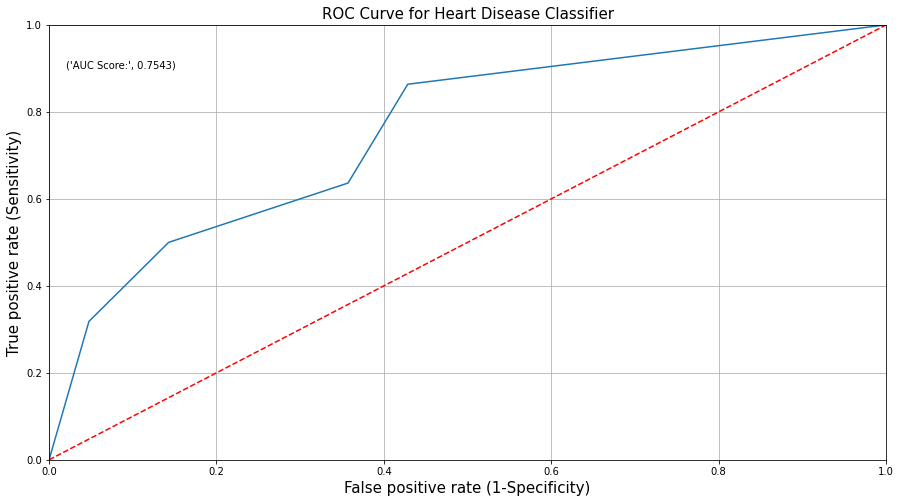

In [70]:
# call the function 'plot_roc' to plot the ROC curve
# pass the decision tree (GridSearchCV) model to the function
plot_roc(dt_grid_model)

<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).<br><br>
We see our classifier (decision tree with GridSearchCV) to be away from the dotted line with the AUC score 0.7543.</b>
                </font>
            </div>
        </td>
    </tr>
</table>



<a id="conclusion"> </a>
# 6. Conclusion and Interpretation

To take the final conclusion, let us print the result table.

**Tabulate the results**

In [71]:
# use the function 'update_score_card' to store the performance measures
# pass the 'Decision Tree (GridSearchCV)' as model name to the function
update_score_card(model_name = 'Decision Tree (GridSearchCV)')

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,Kappa Score,f1-score
0,Decision Tree,0.710498,0.743590,0.659091,0.709302,0.419860,0.698795
1,Decision Tree (Pruned),0.738907,0.738095,0.704545,0.720930,0.442162,0.720930
2,Decision Tree (GridSearchCV),0.754329,0.678571,0.863636,0.720930,0.437908,0.760000


<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b> The supervised classification learning algorithms named in the above table have been implemented on the given dataset. The performance of the models were evaluated using AUC score, accuracy, precision, f1-score, recall, and kappa score. </b>
                </font>
            </div>
        </td>
    </tr>
</table>





<table align="left">
    <tr>
        <td width="8%">
            <img src="infer.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b><br><br>

The above table shows that the Decision Tree (GridSearchCV) has the highest values for most of the performance measures like AUC Score, Recall, f1-score, accuracy. Therefore, it can be concluded that the Decision Tree (GridSearchCV) can be used to predict the existence of heart disease in the patients. In future when we have more observations or bigger dataset and we can also apply ensemble techniques for prediction that can be tested again.</b>
                </font>
            </div>
        </td>
    </tr>
</table>